# 1)Let us first import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2)Loading the dataset
To import the dataset we will use Pandas library.It is the best Python library to play with the dataset and has a lot of functionalities.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
suicide_df = pd.read_csv(r'/content/gdrive/MyDrive/Multivariate/master.csv')

In [ ]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']


df.columns.tolist() fetches all the columns and then convert it into list type.This step is just to check out all the column names in our data.Columns are also called as features of our datasets.

In [ ]:
df.shape

(27820, 12)

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


df.head() displays first five rows of our datasets.

In [ ]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


**df.corr()** compute pairwise correlation of columns.Correlation shows how the two variables are related to each other.Positive values shows as one variable increases other variable increases as well. Negative values shows as one variable increases other variable decreases.Bigger the values,more strongly two varibles are correlated and viceversa.


**Visualising correlation using Seaborn library**

<ipython-input-8-effb445d3340>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


Text(0.5, 1.0, 'Correlation between different fearures')

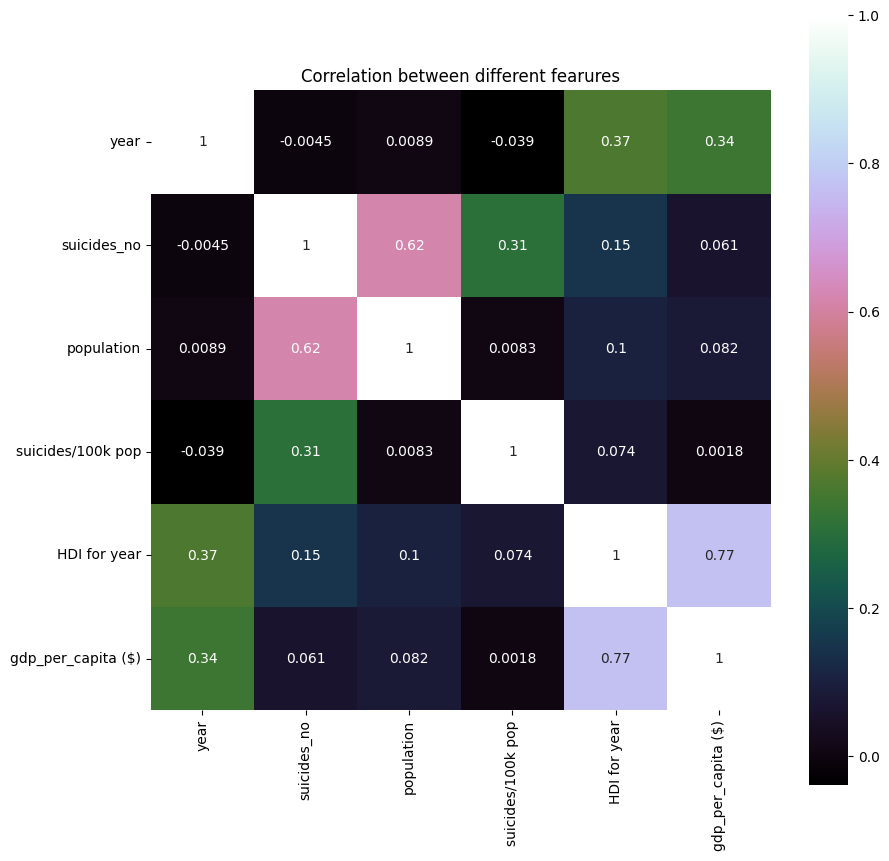

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

# Principal Component Analysis

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df_drop=df.drop(labels=['country','sex','age','country-year',' gdp_for_year ($) ','generation',
                        'HDI for year'],axis=1)
df_drop.head()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
0,1987,21,312900,6.71,796
1,1987,16,308000,5.19,796
2,1987,14,289700,4.83,796
3,1987,1,21800,4.59,796
4,1987,9,274300,3.28,796


**df.drop()**  is the method to drop the columns in our dataframe

In [ ]:
cols = df_drop.columns.tolist()
cols

['year',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'gdp_per_capita ($)']

Now we are separating features of our dataframe from the labels.

In [ ]:
X = df_drop.iloc[:,1:8].values
y = df_drop.iloc[:,0].values
X

array([[2.100000e+01, 3.129000e+05, 6.710000e+00, 7.960000e+02],
       [1.600000e+01, 3.080000e+05, 5.190000e+00, 7.960000e+02],
       [1.400000e+01, 2.897000e+05, 4.830000e+00, 7.960000e+02],
       ...,
       [6.000000e+01, 2.762158e+06, 2.170000e+00, 2.309000e+03],
       [4.400000e+01, 2.631600e+06, 1.670000e+00, 2.309000e+03],
       [2.100000e+01, 1.438935e+06, 1.460000e+00, 2.309000e+03]])

In [ ]:
y

array([1987, 1987, 1987, ..., 2014, 2014, 2014])

In [ ]:
np.shape(X)

(27820, 4)

Thus X is now matrix with 27820 rows and 4 columns

In [ ]:
np.shape(y)

(27820,)

y is now matrix with 27820 rows and 1 column

# 4) Data Standardisation
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model.
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# 5) Computing Eigenvectors and Eigenvalues:
Before computing Eigen vectors and values we need to calculate covariance matrix.

## Covariance matrix

In [ ]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.00003595 0.61618442 0.30661547 0.06133195]
 [0.61618442 1.00003595 0.00828527 0.08151279]
 [0.30661547 0.00828527 1.00003595 0.0017852 ]
 [0.06133195 0.08151279 0.0017852  1.00003595]]


In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[1.00003595 0.61618442 0.30661547 0.06133195]
 [0.61618442 1.00003595 0.00828527 0.08151279]
 [0.30661547 0.00828527 1.00003595 0.0017852 ]
 [0.06133195 0.08151279 0.0017852  1.00003595]]


Equivalently we could have used Numpy np.cov to calculate covariance matrix

Text(0.5, 1.0, 'Correlation between different features')

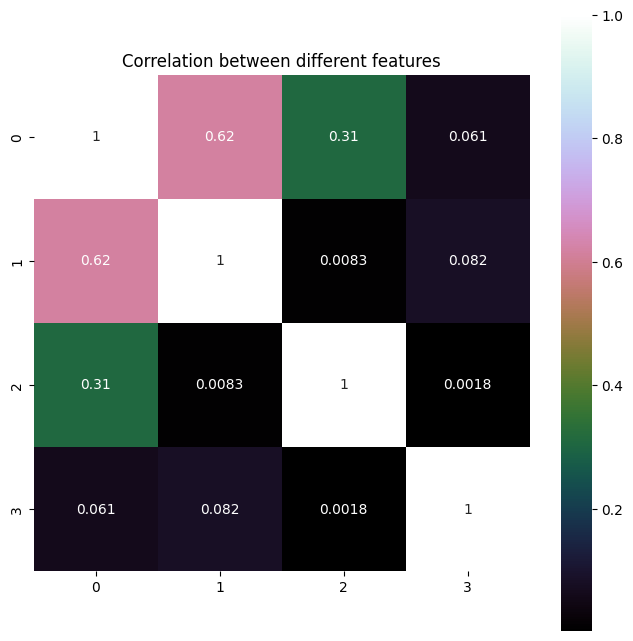

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

# Eigen decomposition of the covariance matrix

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[-0.69841298 -0.70808691  0.07882126 -0.06796652]
 [-0.63005881  0.63466566  0.35433932  0.27325637]
 [-0.31170308  0.30926573 -0.57727335 -0.68844127]
 [-0.13448566 -0.01292838 -0.7314276   0.66840117]]

Eigenvalues 
[1.70456706 0.31494515 0.95534677 1.0252848 ]


# 6) Selecting Principal Components

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.704567064369508
1.0252848033582442
0.9553467651200833
0.31494515377281795


**Explained Variance**
After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

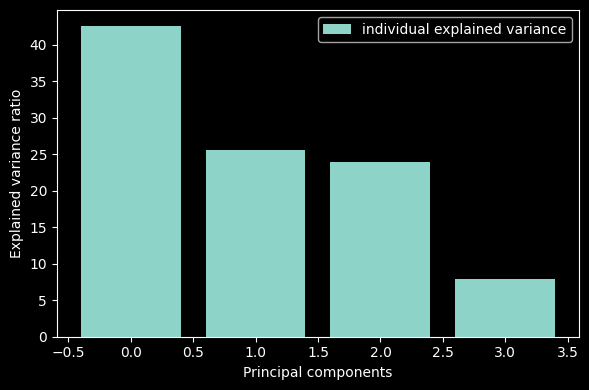

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above clearly shows that maximum variance (somewhere around 40%) can be explained by the first principal component alone. The second,third principal component share almost equal amount of information.Comparatively 4th component share less amount of information as compared to the rest of the Principal components.But we can drop the last component as it has less than 10% of the variance.

**Projection Matrix**

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.69841298 -0.06796652]
 [-0.63005881  0.27325637]
 [-0.31170308 -0.68844127]
 [-0.13448566  0.66840117]]


**Projection Onto the New Feature Space**
In this last step we will use the 4×1-dimensional projection matrix W to transform our samples onto the new subspace via the equation
**Y=X×W**

In [ ]:
Y = X_std.dot(matrix_w)
Y

array([[ 0.63310692, -0.43733512],
       [ 0.66275481, -0.38211259],
       [ 0.67316897, -0.3701694 ],
       ...,
       [ 0.27226856, -0.05079661],
       [ 0.31390531, -0.04055732],
       [ 0.52726813, -0.11451445]])

# PCA in scikit-learn

<ipython-input-44-6dad6a20e1e5>:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,7,1)


Text(0, 0.5, 'Cumulative explained variance')

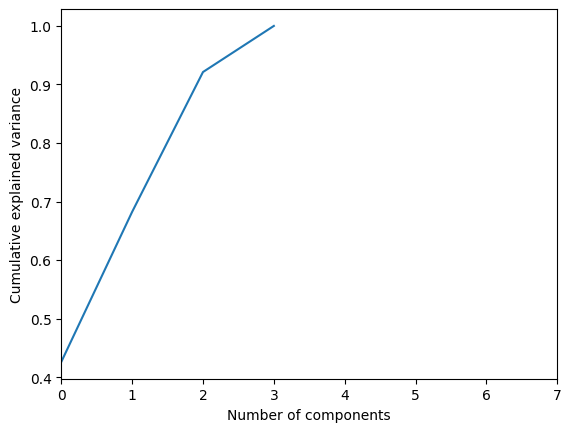

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

The above plot shows almost above 90% variance by the first 3 components. Therfore we can drop 4th component.

In [ ]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [ ]:
print(Y_sklearn)

[[-1.90035018 -1.12083103 -0.0797787   0.03228437 -0.07256447  0.06063013]
 [ 2.1358322   0.2493369   0.0936161   0.50676925  1.2487747  -0.61378158]
 [ 3.05891625 -1.68312693 -0.301682   -0.4488635  -1.12495888  0.29066929]
 ...
 [-2.0507165  -1.182032   -0.04594506  0.02441143 -0.01553247  0.24980658]
 [ 2.91418496 -1.42752606 -0.36333357 -0.31517759 -0.97107375  0.51444624]
 [-1.91543672 -1.17021407 -0.07024077  0.01486762 -0.09545357  0.01773844]]


In [ ]:
Y_sklearn.shape

(27820, 4)

Thus Principal Component Analysis is used to remove the redundant features from the datasets without losing much information.These features are low dimensional in nature.The first component has the highest variance followed by second, third and so on.PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.